# Calibrating the Liquid Drop Model

The purpose of this challenge is for you to calibrate the Liquid Drop Model https://en.wikipedia.org/wiki/Semi-empirical_mass_formula and compare the results of a "black box" calibration vs a principled Bayesian one.

Your task is to:

- Import the data from the AME 2016 table (included in the github). We are only using nuclei above A=16 to avoid light nuclei where the LDM fails particularly. Perform a curve fit using the built in functions from python (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and take note of the reported uncertainties in the parameters. 
- Make a plot of the residuals and estimate the model error on its best fit. 
- Make a model calibration using the Bayesian formalism we defined and a Metropolis sampler. For the error, use your estimation from the previous point (the model error in this case is much smaller than the actual experimental uncertainties). 
- Plot the corner plot posterior as well as the model values on the Binding Energy per nucleon for the Calcium chain up to 60Ca including the available experimental data.
- What would be the results if you have used in the calibration the Binding Energy per nucleon instead of the total Binding Energy?
- Bonus: Find the experimental error in the masses and repeat the calibration using only experimental errors. This should give a good demonstration on the dangers of not taking into account model errors. 


## Import data and use ```curve_fit```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('Masses2016.txt', skiprows=1)

# def LDM(x,param):
def LDM(x,params1,params2,params3,params4):
    #x = (n,z)
    #params= parameters (volume, surface, asymmetry, Coulomb)
    
    n=x[0]
    z=x[1]
    
    return params1*(n+z) - params2*(n+z)**(2/3) - params3*((n-z)**2/(n+z)) - params4*((z**2)/((n+z)**(1/3)))

In [3]:
from scipy.optimize import curve_fit

In [4]:
params, covariance = curve_fit(LDM,data[:,:2].T,data[:,2])
perr = np.sqrt(np.diag(covariance))

## Plot residuals

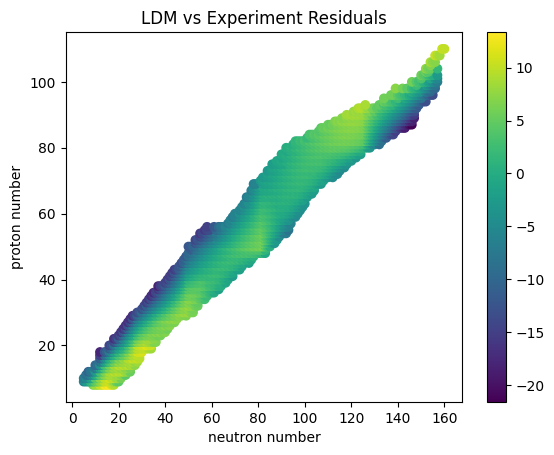

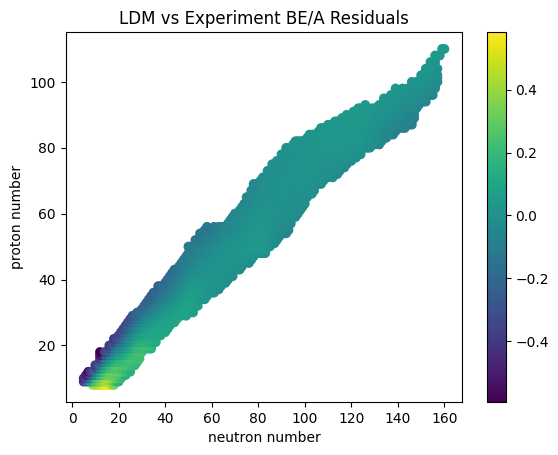

In [5]:
neut = data[:,0]
prot = data[:,1]
vals = data[:,2]

residuals = vals-LDM([neut,prot],params[0],params[1],params[2],params[3])
residualBEperA = residuals / (neut+prot)

sc = plt.scatter(neut,prot,c=residuals)
plt.colorbar(sc)

plt.xlabel('neutron number')
plt.ylabel('proton number')
plt.title('LDM vs Experiment Residuals')
plt.show()

sc = plt.scatter(neut,prot,c=residualBEperA)
plt.colorbar(sc)

plt.xlabel('neutron number')
plt.ylabel('proton number')
plt.title('LDM vs Experiment BE/A Residuals')
plt.show()

## Make model calibration using Bayes formalism and a Metropolis sampler